<a href="https://colab.research.google.com/github/jgoncsilva/Classes_IronHack/blob/master/statistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# crucial library we will use is called scipy

from scipy import stats
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
# generating a random distribution of numbers, centered around 10, with standard deviation of 2 and the skewness is "a"
# generates 100 numbers (size)

skewed_data = stats.skewnorm.rvs(a = -2 , loc = 10, scale = 2, size = 100)

(array([ 1.,  3.,  3.,  4.,  3., 16., 27., 17., 16., 10.]),
 array([ 4.54709967,  5.18375248,  5.8204053 ,  6.45705811,  7.09371093,
         7.73036374,  8.36701656,  9.00366937,  9.64032219, 10.276975  ,
        10.91362782]),
 <a list of 10 Patch objects>)

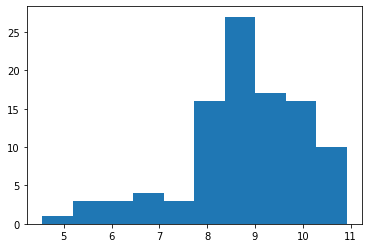

In [ ]:
plt.hist(skewed_data)

In [ ]:
# but how much is the skewness coefficient of this distribution?
# scipy has many functions that calculate the formulas of yesterday's class for you

stats.skew(skewed_data)

-0.8823907866921308

In [ ]:
# how about my kurtosis?

stats.kurtosis(skewed_data, fisher = True)

0.8879997230477099

In [ ]:
# the concepts of standardization and normalization


# different way to quickly generate a normal distribution
data1 = np.random.normal(loc = 20, scale = 5, size = 20000)
data2 = np.random.normal(loc = 100, scale = 20, size = 2000)

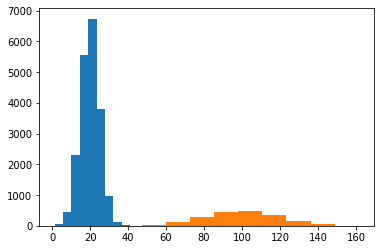

In [ ]:
# when I plot both number distributions together, of course they live in different worlds of scale and location
plt.hist(data1)
plt.hist(data2)
plt.show()

(array([  1.,   5.,  19.,  38.,  92., 179., 257., 261., 134.,  14.]),
 array([-4.3524985 , -3.68233851, -3.01217852, -2.34201853, -1.67185854,
        -1.00169856, -0.33153857,  0.33862142,  1.00878141,  1.6789414 ,
         2.34910139]),
 <a list of 10 Patch objects>)

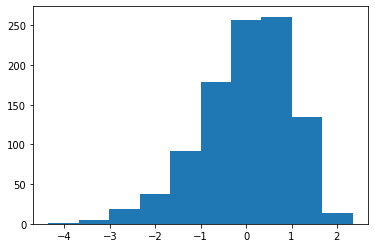

In [ ]:
# let's standardize them

# this transformation forces the mean to be zero, by subtracting the mean. and then forcing the standard deviation to be 1

data_3 = stats.skewnorm.rvs(a = -4 , loc = 10, scale = 2, size = 1000)

data1_stand = (data1 - np.mean(data1))/np.std(data1)

data2_stand = (data2 - np.mean(data2))/np.std(data2)

data3_stand = (data_3 - np.mean(data_3))/np.std(data_3)

plt.hist(data3_stand)

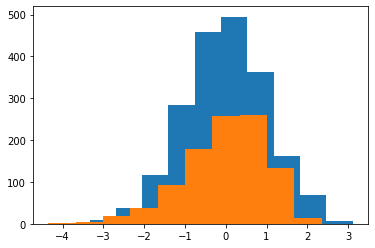

In [ ]:
# standardizations brings both distributions to be centered on zero and standard deviation 1 -> good for machine learning
plt.hist(data2_stand)
plt.hist(data3_stand)
plt.show()

In [ ]:
# normalization

normalized_1 = (data1 - np.min(data1))/(np.max(data1)- np.min(data1))
normalized_2 = (data2 - np.min(data2))/(np.max(data2)- np.min(data2))

normalized_3 = (data_3 - np.min(data_3))/(np.max(data_3)- np.min(data_3))

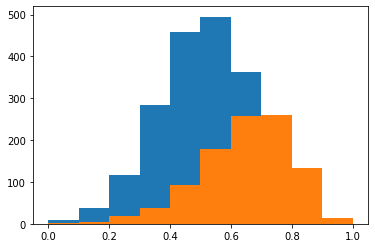

In [ ]:
plt.hist(normalized_2)
plt.hist(normalized_3)
plt.show()

# in the standardization your are forcing them to have the same distribution (normal), in the normalization your are forcing them to be in the same referential

In [ ]:
stats.skew(normalized_3)

-0.7190520474769648

In [ ]:
stats.skew(data3_stand)

-0.719052047476962

(array([  6.,  17.,  86., 249., 469., 488., 417., 210.,  46.,  12.]),
 array([-45.26977918, -35.08258525, -24.89539132, -14.7081974 ,
         -4.52100347,   5.66619046,  15.85338438,  26.04057831,
         36.22777224,  46.41496616,  56.60216009]),
 <a list of 10 Patch objects>)

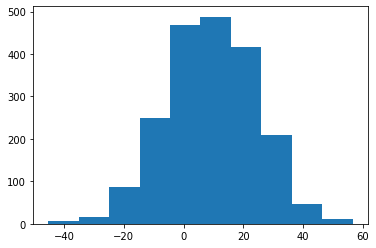

In [ ]:
plt.hist(data1)

In [ ]:
np.mean(data1)

0.07132529548357114

In [ ]:
data_1 = np.random.normal(loc = 1, scale = 2, size = 200)
data_2 = np.random.normal(loc = 1, scale = 2, size = 200)



In [ ]:
# I want to study their covariance

# we must stack the points side by side

stacked =  np.stack((data_1,data_2), axis = 0)

In [ ]:
# now we are in a position to calculate the covariance 

np.cov(stacked)

array([[ 3.30173394, -0.43709525],
       [-0.43709525,  4.00806355]])

In [ ]:
# how to interpret this matrix?

# 1st position -> Cov(data_1 with data_1)

# position 2 -> are the value of the covariance between both variables (data_1,data_2)
# position 3 -> are the value of the covariance between both variables (data_2, data_1)

# position 4 -> cov(data_2,data_2)

In [ ]:
np.corrcoef(stacked)

array([[ 1.        , -0.12015387],
       [-0.12015387,  1.        ]])

In [ ]:
# Linear regression

In [ ]:
# generating an array of x values
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y = x + 2
y2 = x + 3
y3 = x - 1

#here we are changing the y-intercept, which controls the height og the line

In [ ]:
y

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

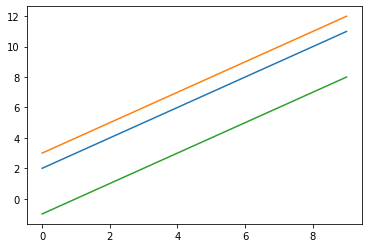

In [ ]:
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

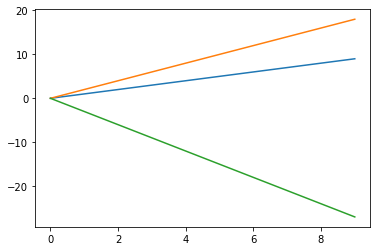

In [ ]:
y = x 
y2 = 2*x 
y3 = -3*x


plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [ ]:
# what are the parameters that define the amily of straight lines

# gradient/slope 

# y-intercept -> the height of the line

In [ ]:
data = pd.read_csv("dailyActivity_merged.csv")

In [ ]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
# steps is our independent variable (what we control)
# caloris burnt that day the dependent variable

x = data['TotalSteps']
y = data['Calories']

In [ ]:
# to perform the linear regression I use the stats model in scipy

results = stats.linregress(x,y)
results

LinregressResult(slope=0.08782201641318159, intercept=1614.5206467338903, rvalue=0.5813801894994011, pvalue=1.1249929081423457e-42, stderr=0.005761897288439592)

In [ ]:
# I am creating the full regression line (of best fit), based on the results of my linear regression
regression_line = results[0]*x + results[1]

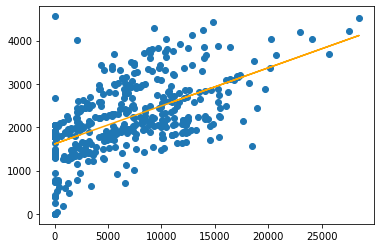

In [ ]:
# the r value is the pearson correlation coefficient and goes between -1 and 1, and states the "quality of the fit"

# sometimes the metric shown is the R^2 (R squared) = r^2 , this number goes from 0 to 1 and is the main metric 
# of the quality of the fit

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [ ]:
results[1]

1614.5206467338903

In [ ]:
data = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# we want to find a model, that explains the median house value

y = data['median_house_value']
x = data['median_income']



In [ ]:
stats.linregress(x,y)

LinregressResult(slope=42054.07487405612, intercept=43980.62815629656, rvalue=0.6918706037806692, pvalue=0.0, stderr=336.615749084671)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# simple linear regression
median_house_value = 10*median_income + 4

# why not try a multi linear regression

median_house_value = 10*median_income + 3*total_bedrooms -0.1*population + 4



In [ ]:
# the best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves

In [ ]:
# multi linear regression -> one dependent variable (y) but multiple independent variable (x)

# y = x1*a + x2*b + c

# this model is still a straight line, but has 2 inputs (x1, x2)

In [ ]:
import statsmodels.api as sm

X = data[['median_income','housing_median_age']]

y = data['median_house_value']

# how about the intersection? -> this model by defauly doesnt include it
#X = sm.add_constant(X)

In [ ]:
# this syntax here is fitting the model to take our X variables and calculate y
model = sm.OLS(y,X).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          6.475e+04
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:29:12   Log-Likelihood:                     -2.1624e+05
No. Observations:               17000   AIC:                                  4.325e+05
Df Residuals:                   16998   BIC:                                  4.325e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_income       4.221e+04    239.485    176.249      0.000    4.17e+04    4.27e+04
housing_median_age  1551.1071     33.174     46.757      0.000    1486.083    1616.131
==============================================================================
Omnibus:                     3466.454   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8100.178
Skew:                           1.151   Prob(JB):                         0.00
Kurtosis:                       5.477   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
median_value = 1114*latutitude + 42960*median_income 

In [ ]:
# advanced fiting topic

xdata = np.linspace(0,15,100)


In [ ]:
xdata

array([ 0.        ,  0.15151515,  0.3030303 ,  0.45454545,  0.60606061,
        0.75757576,  0.90909091,  1.06060606,  1.21212121,  1.36363636,
        1.51515152,  1.66666667,  1.81818182,  1.96969697,  2.12121212,
        2.27272727,  2.42424242,  2.57575758,  2.72727273,  2.87878788,
        3.03030303,  3.18181818,  3.33333333,  3.48484848,  3.63636364,
        3.78787879,  3.93939394,  4.09090909,  4.24242424,  4.39393939,
        4.54545455,  4.6969697 ,  4.84848485,  5.        ,  5.15151515,
        5.3030303 ,  5.45454545,  5.60606061,  5.75757576,  5.90909091,
        6.06060606,  6.21212121,  6.36363636,  6.51515152,  6.66666667,
        6.81818182,  6.96969697,  7.12121212,  7.27272727,  7.42424242,
        7.57575758,  7.72727273,  7.87878788,  8.03030303,  8.18181818,
        8.33333333,  8.48484848,  8.63636364,  8.78787879,  8.93939394,
        9.09090909,  9.24242424,  9.39393939,  9.54545455,  9.6969697 ,
        9.84848485, 10.        , 10.15151515, 10.3030303 , 10.45

In [ ]:
# create a model of a non linear function

# creating random noise
#np.random.seed(1729)
y_noise = 4*np.random.normal(size = xdata.size)

y = 0.5*np.square(xdata) + y_noise

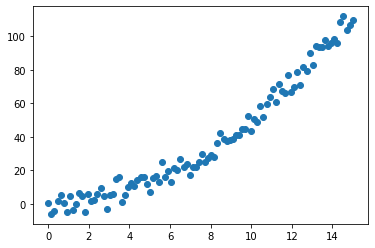

In [ ]:
plt.plot(xdata,y, 'o')
plt.show()

In [ ]:
# fit a quadratic equation to these points

# I am defining the family of the functions I want
# y = a*x^2 + b*x + c

def quadratic_function(x, a,b,c):
  # defining the general formula of a quadratic
  return a*np.square(x) + b*x +c

# x are my inputs
# a,b,c are the parameters of the function I need to optimize

from scipy.optimize import curve_fit

# this module will take X values, will take Y values and will take the shape of the function you want
# and it will return the best possible parameters that git

result = curve_fit(quadratic_function, xdata, y)

In [ ]:
# this returns a tuple where the most important thing is the first element

# these numbers represent the best possible values of a,b,c that the computer found to fit the curve
best_curve = result[0][0]*np.square(xdata) + result[0][1]*xdata + result[0][2]

#best_curve = quadratic_function(result[00])

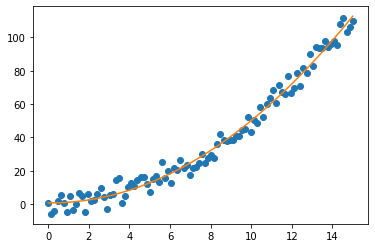

In [ ]:
plt.plot(xdata,y,'o')
plt.plot(xdata, best_curve)

In [ ]:
result

(array([ 0.50562224, -0.11910606,  0.77055427]),
 array([[ 6.24660507e-04, -9.36990777e-03,  2.31881536e-02],
        [-9.36990777e-03,  1.50104958e-01, -4.19494850e-01],
        [ 2.31881536e-02, -4.19494850e-01,  1.58111747e+00]]))